In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def plot_historical_and_forecast(input_timeseries, 
                                 timestamp_col_name, 
                                 data_col_name, 
                                 forecast_output=None, 
                                 actual=None, 
                                 title=None,
                                 plotstartdate=None):

    if plotstartdate:
        input_timeseries[timestamp_col_name] = pd.to_datetime(input_timeseries[timestamp_col_name])
        input_timeseries = input_timeseries[input_timeseries[timestamp_col_name] >= pd.to_datetime(plotstartdate)]
        
    input_timeseries = input_timeseries.sort_values(timestamp_col_name)    
    
    # Plot the input historical data
    plt.figure(figsize=(20,6))
    plt.plot(input_timeseries[timestamp_col_name], input_timeseries[data_col_name], label = 'Histórico')
    plt.xlabel(timestamp_col_name)
    plt.ylabel(data_col_name)

    if forecast_output is not None:
        forecast_output = forecast_output.sort_values('forecast_timestamp')
        forecast_output['forecast_timestamp'] = pd.to_datetime(forecast_output['forecast_timestamp'])
        x_data = forecast_output['forecast_timestamp']
        y_data = forecast_output['forecast_value']
        confidence_level = forecast_output['confidence_level'].iloc[0] * 100
        low_CI = forecast_output['confidence_interval_lower_bound']
        upper_CI = forecast_output['confidence_interval_upper_bound']
        # Plot the forecast data
        plt.plot(x_data, y_data, alpha = 1, label = 'Predicción', linestyle='--')
        # Shade the confidence interval
        plt.fill_between(x_data, low_CI, upper_CI, color = '#539caf', alpha = 0.4, 
                         label = f'Intérvalo de confianza de {confidence_level}%')

    # Plot actual data
    if actual is not None:
        actual = actual.sort_values(timestamp_col_name)
        plt.plot(actual[timestamp_col_name], actual[data_col_name], label = 'Actual', linestyle='--')   

    # Display title, legend
    plt.title(f'{title}', fontsize= 16)
    plt.legend(loc = 'upper center', prop={'size': 16})

In [3]:
datah = pd.read_csv('bquxjob_273dc433_189d60b30af.csv')
dataf = pd.read_csv('bquxjob_6c9301c6_189d6528ce8.csv')

In [9]:
datah['day'] = pd.to_datetime(datah['day'])
dataf['forecast_timestamp'] = pd.to_datetime(dataf['forecast_timestamp'])

# Remove timezone from 'day' column in input_timeseries DataFrame
datah['day'] = datah['day'].dt.tz_localize(None)

# Remove timezone from 'forecast_timestamp' column in forecast_output DataFrame
dataf['forecast_timestamp'] = dataf['forecast_timestamp'].dt.tz_localize(None)

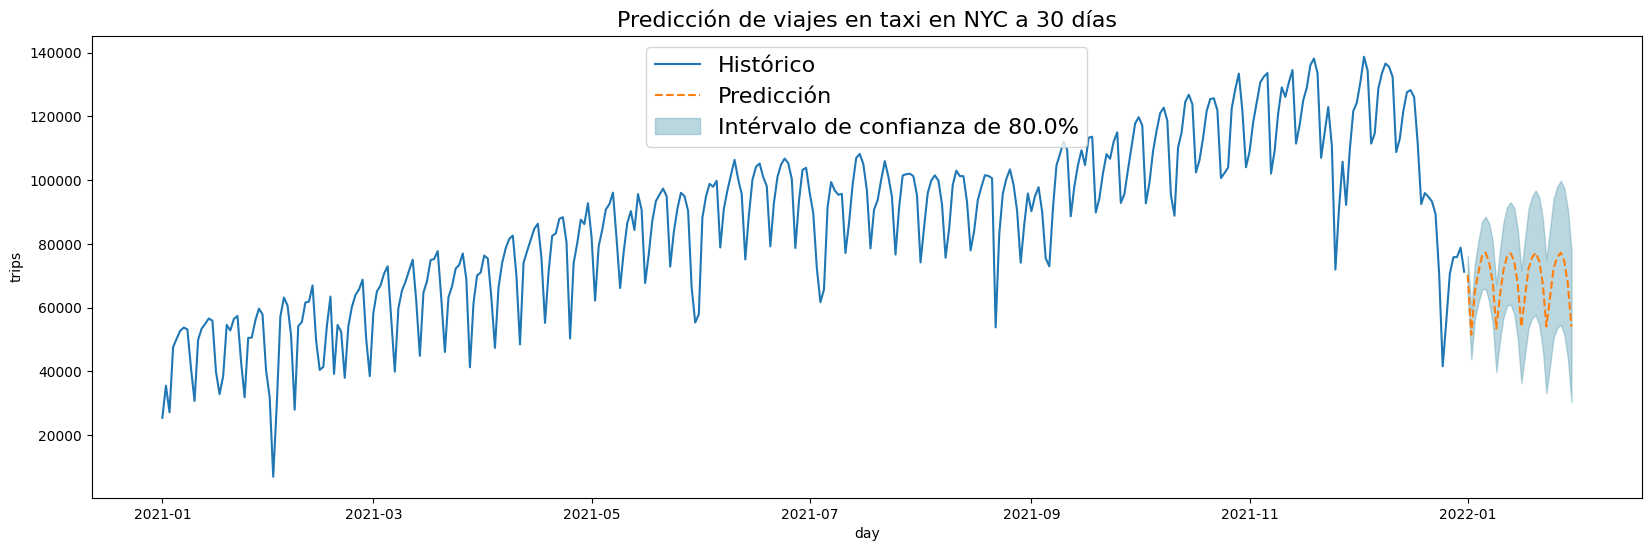

In [15]:
plot_historical_and_forecast(input_timeseries = datah, 
                                 timestamp_col_name = "day", 
                                 data_col_name = "trips", 
                                 forecast_output = dataf, 
                                 actual = None,
                                 title = 'Predicción de viajes en taxi en NYC a 30 días')